# Part I - ( Ford go bike trip data)
## by (Wejdan Mangl)

## Introduction

> The dataset is about the FordGoBike system and the rides in San Francisco Bay area. 
The data consist of 183412 rows and 16 columns.



## Preliminary Wrangling


In [104]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [105]:
#Load the dataset in dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [106]:
#view the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [107]:
#the number of rows and columns (df structure)
df.shape

(183412, 16)

In [108]:
#overview of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [109]:
#statistical summary
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> The data consist of 183412 rows and 16 columns with different data types Int, object, and float. I noticed the year of birth that should be age and the trip's duration in minutes not seconds for easier visualizing.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in ride durations, the stations, and the members.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since I wanted to investigate both rides and members, I will explore all available features.

* missing values

In [110]:
#check null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [111]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [112]:
#replace null with the most common
df['member_gender'].fillna(value='Male', inplace=True)

In [113]:
df['member_gender'].isna().sum()

0

In [114]:
df['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [115]:
#replace null with the most common
df['member_birth_year'].fillna(value=1988.0, inplace=True)

In [116]:
df['member_birth_year'].isna().sum()

0

In [117]:
#drop the remaining null values
df = df.dropna(axis = 0)

In [118]:
#check null values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

* Data Type

In [119]:
#columns data types
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [120]:
#convert gender from object to category
df['member_gender']= df['member_gender'].astype('category')

In [121]:
#convert bike_share_for_all_trip from object to category
df['bike_share_for_all_trip']= df['bike_share_for_all_trip'].astype('category')

In [122]:
#convert user_type from object to category
df['user_type']= df['user_type'].astype('category')

In [123]:
#convert year of birth from float to int
df['member_birth_year'] = df['member_birth_year'].astype(int)

* Transform seconds to minutes

In [124]:
df['duration_min'] = df['duration_sec'] // 60

In [125]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1988,Male,No,708
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26


* Transform the year of birth to age

In [126]:
from datetime import date
 
def age(yearofbirth):
    today = date.today()
    age = today.year - yearofbirth 
    return age

In [127]:
df['age'] = age(df['member_birth_year'] )

In [128]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869,38


## Univariate Exploration

### Question 1: What is the distribution of the bike ride duration?

##### >> The distribution of trip duration (in seconds)

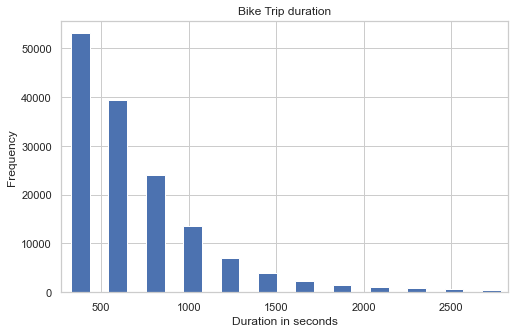

In [129]:
# The distribution of trip duration (in seconds)
plt.figure(figsize = (8,5))
df['duration_sec'].hist(bins=400, rwidth=0.5)
plt.xlim(272, 2822)
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
plt.title("Bike Trip duration")
plt.show()

* Answer: Right Skewed (positive), the long tail on the right
* Most of the trips duration less than one hour

##### >> The distribution of trip duration (in minutes)

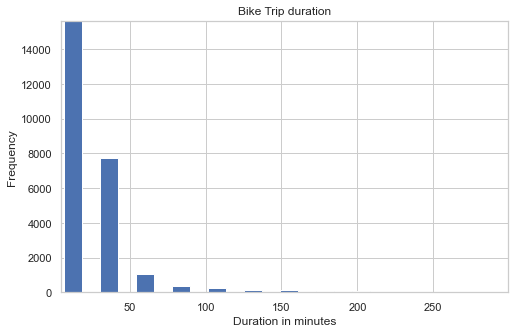

In [130]:
# The distribution of trip duration (in minutes)
plt.figure(figsize = (8,5))
df['duration_min'].hist(bins=60, rwidth=0.5)
plt.xlim(5, 299)
plt.ylim(0,15643)
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title("Bike Trip duration")
plt.show()

* Right Skewed (positive), the long tail on the right
* Most of the trips duration less than one hour

### Question 2: What is the distribution of the user type?

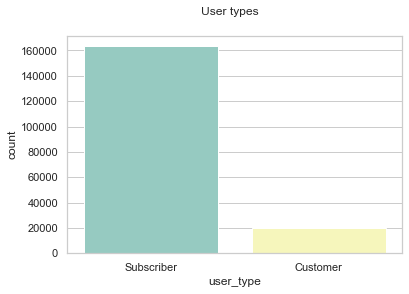

In [131]:
# The distribution of the user type
p = sb.countplot(data=df, x='user_type',palette="Set3",
                  order=df['user_type'].value_counts().index)
p.figure.suptitle('User types');

* The members with Subscriber type is more than the Customer type

### Question 3: What is the distribution of the member's age?

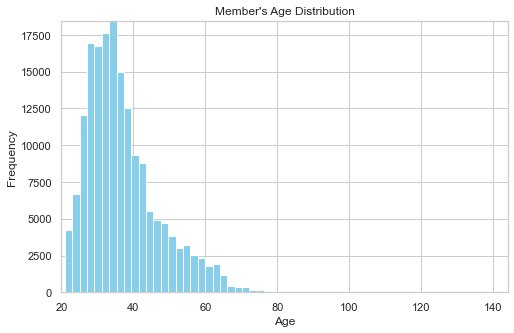

In [132]:
# The distribution of the member's age
plt.figure(figsize = (8,5))
df['age'].hist(bins=60, color = "skyblue")
plt.xlim(20, 144)
plt.ylim(0,18477)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Member's Age Distribution")
plt.show()

* Right Skewed (positive), the long tail on the right
* outlier ages (more than 120)

In [133]:
# Age Outliers

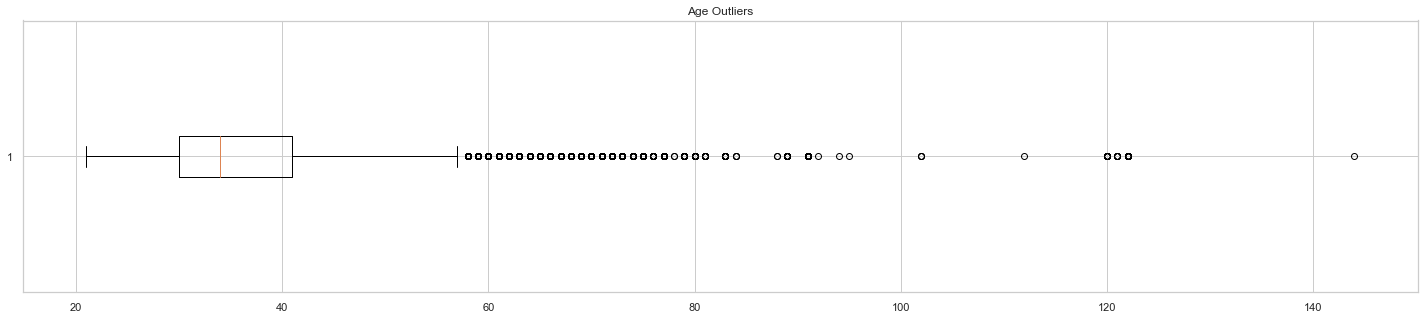

In [134]:
fig = plt.figure(figsize = (25, 5))

plt.boxplot(df['age'],vert=False)
plt.title("Age Outliers")
plt.show()

In [135]:
# use describe function to find Q1 = 25% and Q3 = 75%
df['age'].describe()

count    183215.000000
mean         37.052687
std           9.910151
min          21.000000
25%          30.000000
50%          34.000000
75%          41.000000
max         144.000000
Name: age, dtype: float64

In [136]:
Q1 = 30.000000
Q3 = 41.000000
IQR= Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [137]:
df = df.loc[(df['age'] > lower_limit) & (df['age'] < upper_limit)]

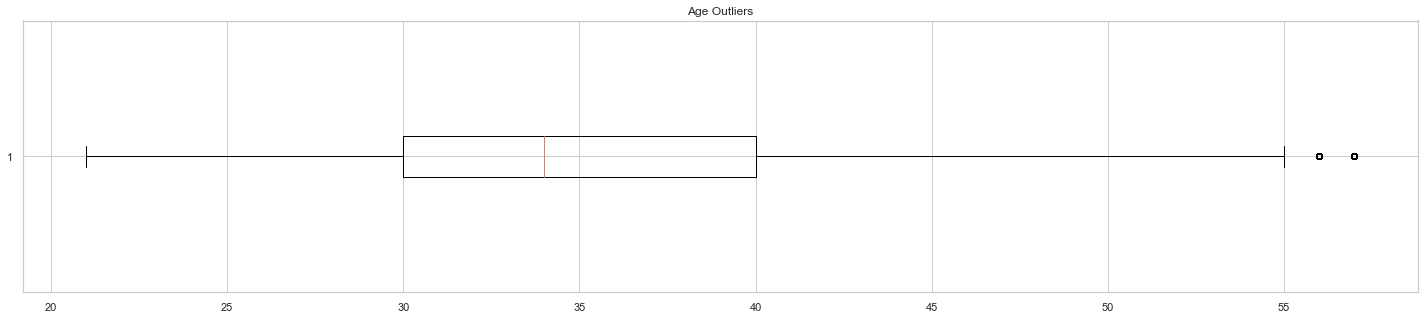

In [138]:
fig = plt.figure(figsize = (25, 5))

plt.boxplot(df['age'],vert=False)
plt.title("Age Outliers")
plt.show()

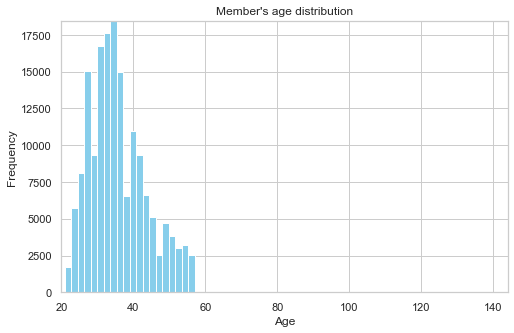

In [139]:
# The distribution of the member's age
plt.figure(figsize = (8,5))
df['age'].hist(bins=20, color = "skyblue")
plt.xlim(20, 144)
plt.ylim(0,18477)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Member's age distribution")
plt.show()

* Right Skewed (positive), the long tail on the right
* the majority in the middle of 30s

### Question 4: What is the distribution of the member's gender?

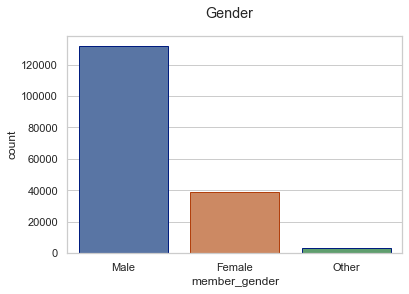

In [140]:
# The distribution of the member's gender
p = sb.countplot(data=df, x='member_gender',
                  order=df['member_gender'].value_counts().index, edgecolor=sb.color_palette("dark", 2))
sb.set_theme(style="whitegrid")
p.figure.suptitle('Gender');

* The majority of members are male

### Question 5: What is the distribution of the bike_share_for_all_trip program?

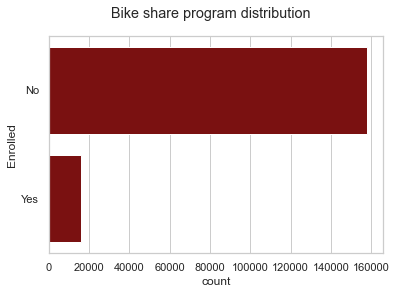

In [141]:
# Bike share program distribution
p = sb.countplot(data=df, y='bike_share_for_all_trip',
                  order=df['bike_share_for_all_trip'].value_counts().index, color='darkred')
p.figure.suptitle('Bike share program distribution');
plt.ylabel('Enrolled');

* The majority of members are not enrolled on the bike share

### Discuss the distribution of the variables of interest. 

> I noticed that most of the duration of the trip is less than one hour. The majority of users are subscribers and Males. Also, I found it interesting that the majority of bike users are not enrolled in the Share Program. I was not expected that most of the user's ages are 30 and above. However, I found it unusual to have ages 100 and above, so I plot the age using a boxplot and I found many outliers points.

### Did you perform any operations on the data?

> I converted the data types of four features Gender, User type, Year of birth, and bike_share_for_all_trip.
I handled the missing values by filling them with the most frequent and dropping some of them. For easy visualization, I transformed the seconds into minutes, and transform the year of birth into the age. Finally, I removed the outliers from age by using the IQR.

## Bivariate Exploration

### Question 6: What the distribution of trip's duration by the user type?

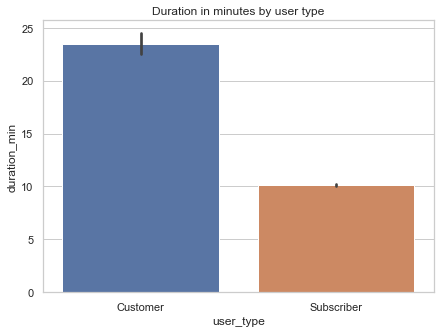

In [142]:
# The relationship between (Duration and User Type)

plt.figure(figsize = (7,5))

sb.barplot(data = df, x = "user_type", y = "duration_min")

plt.title("Duration in minutes by user type");

* Members with Customer type have the longest trips duration

### Question 7: What the distribution of trip's duration by age?

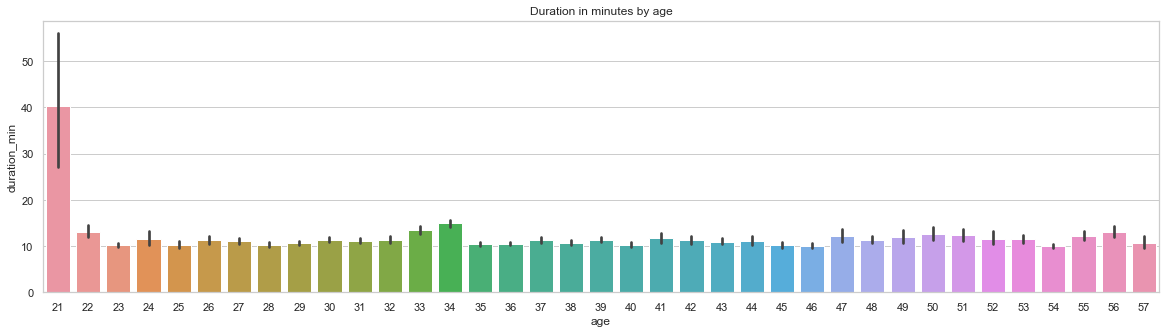

In [143]:
# The relationship between (Duration and Age) 

plt.figure(figsize = (20,5))

sb.barplot(data = df, x = "age", y = "duration_min")
plt.title("Duration in minutes by age");

* Younger members with age 21 have the longest trip duration

### Question 8: What the distribution of trip's duration by the gender?

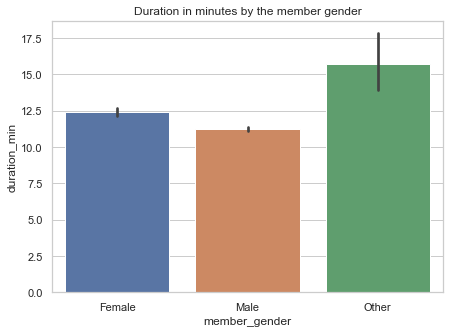

In [144]:
# The relationship between (Duration and Gender)

plt.figure(figsize = (7,5))

sb.barplot(data = df, x = "member_gender", y = "duration_min")
plt.title("Duration in minutes by the member gender");


* female members have lnogest trip duration compared to the male

### Question 9: What the distribution of the age by the gender?

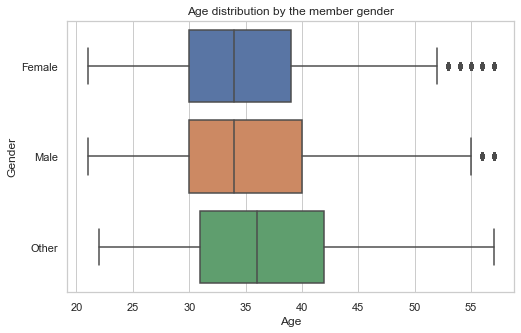

In [145]:
# The relationship between (Age and Gender)
plt.figure(figsize = (8,5))
sb.boxplot(data=df, x = 'age', y= 'member_gender')
plt.title("Age distribution by the member gender")
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

* the majority of female is younger than the male

### Question 10: What the distribution of the age by the user type?

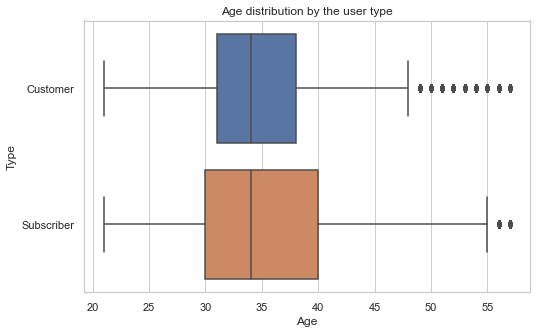

In [146]:
# The relationship between (Age and User Type)
plt.figure(figsize = (8,5))
sb.boxplot(data=df, x = 'age', y= 'user_type')
plt.title("Age distribution by the user type")
plt.xlabel('Age')
plt.ylabel('Type')
plt.show()

* the majority of customers is younger than the subscriber

### Question 11: What the distribution of the age by the bike share?

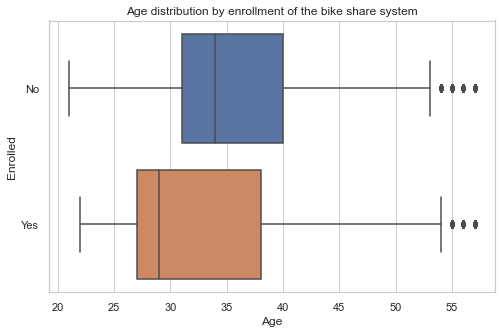

In [147]:
# The relationship between (Age and Bike System)
plt.figure(figsize = (8,5))
sb.boxplot(data=df, x = 'age', y= 'bike_share_for_all_trip')
plt.title("Age distribution by enrollment of the bike share system")
plt.xlabel('Age')
plt.ylabel('Enrolled')
plt.show()

* the majority of members enrolled older than the other

### Question 12: Compare the age distribution between Gender, Bike Share, and User Type?

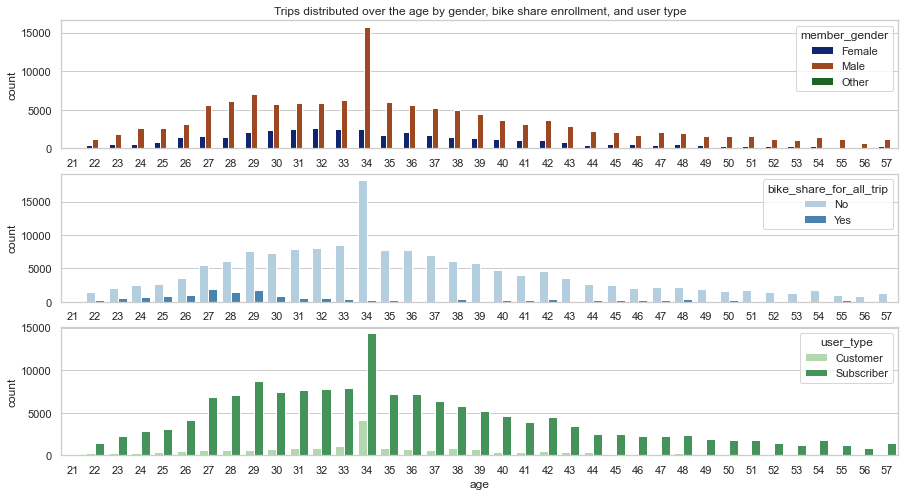

In [148]:
plt.figure(figsize = [15, 8])

# subplot 1: Age and Gender
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'age', hue = 'member_gender', palette = 'dark').set(title='Trips distributed over the age by gender, bike share enrollment, and user type')

# subplot 2: Age and Bike Share
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'age', hue = 'bike_share_for_all_trip', palette = 'Blues')

# subplot 3: Age and User Type
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'age', hue = 'user_type', palette = 'Greens')

plt.show()


* members with 34 age have the most trips regardless of the type, gender, and bike share. The three subplots support the previous findings, most trips are made by males, subscribers, and those who answered no to the bike share.

### Question 13: What is the correlation between all the variables that we explored previously?

In [149]:
Copydf = df.copy()

Copydf.drop(["start_time", "end_time","start_station_id","start_station_name",
            "start_station_latitude", "start_station_longitude","end_station_id",
            "end_station_name","end_station_latitude", "end_station_longitude", "bike_id"], axis = 1, inplace=True)

<AxesSubplot:>

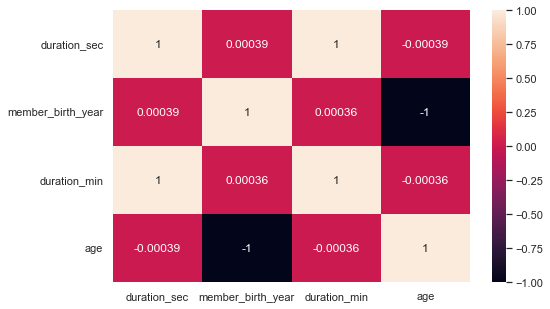

In [150]:
#The correlation between the variables that we explored previously

plt.figure(figsize = (8,5))

sb.heatmap(Copydf.corr(), annot=True)


* I noticed a negative correlation between duration and age and a positive correlation between duration and birth year.

### Talk about some of the relationships you observed in this part of the investigation. 

> as we noticed before that the majority of users are a subscriber but the customer users have the longest trip duration. Also, after plotting the age distribution, users with age 21 have the longest trip duration. The trip duration is close between the Males and Females but the Female users have the longest durations. I was interested to visualize the age distribution by gender, user type, and the bike system. I noticed that the majority of females are younger than the Male. Also, the customer is younger than the subscriber. Also, after I plot the age with three different categorical variables, I found members with 34 age have the most trips regardless of the type, gender, and bike share. The three subplots support the previous findings, most trips are made by males, subscribers, and those who answered no to the bike share. Finally, I used the heatmap, I didn't find a strong correlation between the variables. I noticed a negative correlation between duration and age and a positive correlation between duration and birth year. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Was interesting that after plotting only one variable user_type, I noticed that the majority of users are a subscriber then by plotting the duration and user type, I found out that the customer users have the longest trip duration. Also, after plotting the gender with duration I noticed that the females were younger than the male users. Even if the age majority was 30 and above the users with the age of 21 have the longest trip duration.

## Multivariate Exploration

### Question 14: What the relation between duration and age by the Bike Share?

C:\Users\wmangl\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


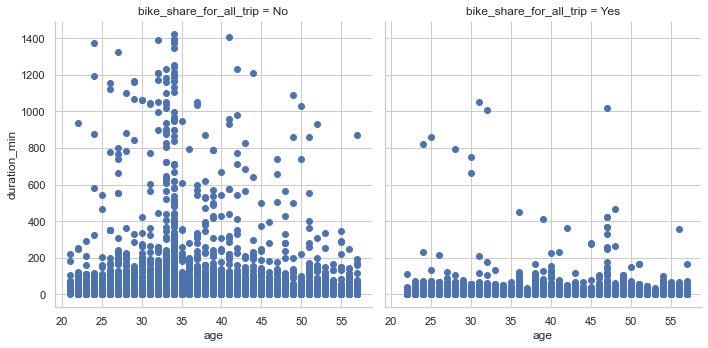

In [151]:

g = sb.FacetGrid(data = df, col = 'bike_share_for_all_trip', size=5)

g.map(plt.scatter,'age','duration_min');


* members who didn't enroll in the bike share have the longest trips at younger ages

### Question 15: What the relation between duration and age by the User Type?

C:\Users\wmangl\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


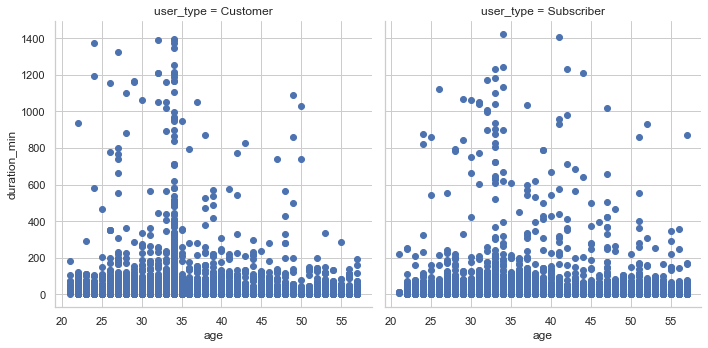

In [152]:

g = sb.FacetGrid(data = df, col = 'user_type', size=5)

g.map(plt.scatter,'age','duration_min');


* the majority of customer type are young and have the longest duration

### Talk about some of the relationships you observed in this part of the investigation. 

> I noticed that the majority of customer type are young and have the longest duration. It was interesting to see that members who didn't enroll in the bike share have the longest trips at younger ages. 


## Conclusions

>Main findings:


* Most of bike trips less than one hour
* Majority of members are Subscribers, Male, age 30 and above, and not enrolled in the Share Program.
* Members with type Customer, Female, and age 21 have the longest trip duration.
* Majority of females are younger than the Male.
* Majority of customer is younger than the subscriber.
* Majority of enrolled users are older than the others.
* Older the member the less trip duration.
* Members who didn't enroll have the longest trips at younger ages.